In [28]:
import gzip, json
import random
import re
import pronouncing
import matplotlib.pyplot as plt

In [2]:
all_lines =[]
for line in gzip.open("gutenberg-poetry-v001.ndjson.gz"):
    all_lines.append(json.loads(line.strip()))

In [3]:
#The following cell builds the data structure proposed above: a dictionary that maps rhyming parts 
#to a dictionary that maps words with that rhyming part to the lines of poetry that they're found at the end of.
from collections import defaultdict
by_rhyming_part = defaultdict(lambda: defaultdict(list))
for line in all_lines:
    text = line['s']
    if not(32 < len(text) < 48): # only use lines of uniform lengths
        continue
    match = re.search(r'(\b\w+\b)\W*$', text)
    if match:
        last_word = match.group()
        pronunciations = pronouncing.phones_for_word(last_word)
        if len(pronunciations) > 0:
               rhyming_part = pronouncing.rhyming_part(pronunciations[0])
               # group by rhyming phones (for rhymes) and words (to avoid duplicate words)
               by_rhyming_part[rhyming_part][last_word.lower()].append(text)
               
               

### Certain words aren't being caught by my pronunciation checker. Is it 'cause they're old english or something?

In [234]:
source_word = 'knelling'
print(source_word.isalpha())
phones = pronouncing.phones_for_word(source_word)[0] #
print(phones)
rhyming_part = pronouncing.rhyming_part(phones)

True


IndexError: list index out of range

These words make my prounouncing library dry heave

In [235]:
bad_words =[]
for line in all_lines:
    text = line['s']
    try:
        pronouncing.phones_for_word(source_word)[0]
    except IndexError:
        bad_words.append(text.split(' ')[-1])
    

In [237]:
len(bad_words)

3085117

In [246]:
bad_words = pd.Series(bad_words)
bad_words.sample(5)

1287796    thresh'd,
272277       reputed
929407         cold,
2024055       twain.
586229       strike,
dtype: object

That's a huge number of bad words. A lot of them have punctuation at the end. I suspect a lot of those are salvagable.

In [334]:
#This whole thing doesn't work super reliably. Some of it has to do with the pronunciation library missing words in my corpus,
#some of it has to do with punctuation. Working on it, but it's not super high priority.
def limirick_machine():
    #Finds you lines that don't need to rhyme
    def initial_line_finder(list_of_existing):
        rand_choice = random.choice(all_lines)['s']
        if rand_choice not in list_of_existing:
            line = rand_choice
            
        while line.split(' ')[-1].isalpha() == False:
            rand_choice = random.choice(all_lines)['s']
            if rand_choice not in list_of_existing:
                line = rand_choice
        
        flag = False
        while flag == False:            
            try:
                
                word_to_rhyme = line.split(' ')[-1]
                phones = pronouncing.phones_for_word(word_to_rhyme)
                phones = phones[0]
                flag= True
                
            except IndexError:  
                
                rand_choice = random.choice(all_lines)['s']
                while line.split(' ')[-1].isalpha() == False:
                    rand_choice = random.choice(all_lines)['s']
                    if rand_choice not in list_of_existing:
                        line = rand_choice
                phones = pronouncing.phones_for_word(word_to_rhyme)
                phones = phones[0]
            
            
            
        
        ###
        
        rhyming_phones = pronouncing.rhyming_part(phones)
        return line, rhyming_phones
    
    # Finds lines that end with similar rhymes.
    def secondary_line_finder(list_of_existing, phones_to_rhyme):   
        
        
        rand_choice = ''
        
        while rand_choice in list_of_existing or rand_choice =='':
            key = random.choice(list(by_rhyming_part[phones_to_rhyme].keys()))    
            rand_choice = random.choice(list(by_rhyming_part[phones_to_rhyme][key]))  
            
        return rand_choice
            

    list_of_lines = []
    line1, line1_phones = initial_line_finder(list_of_lines)
    list_of_lines.append(line1)
        
    line2 = secondary_line_finder(list_of_lines, line1_phones)
    list_of_lines.append(line2)
    
    line3, line3_phones = initial_line_finder(list_of_lines)
    list_of_lines.append(line3)
    
    line4 = secondary_line_finder(list_of_lines, line3_phones)
    list_of_lines.append(line4)
    
    line5 = secondary_line_finder(list_of_lines, line1_phones)

    return line1, line2, line3, line4, line5

    
    

In [335]:
from textblob import TextBlob

In [336]:
line1, line2, line3, line4, line5 = limirick_machine()
print(line1)
print(line2)
print(line3)
print(line4)
print(line5)

To her few little years of glitter and gloom
And come from out the cold and gloom
And serious thoughts began to claim
But all the same, you need not maim
Betwixt the eye and smell, from the curl'd fume


In [283]:
#initial set up.
import pandas as pd
temp_limirick_dict= {'line1':[],'line2':[],'line3':[],'line4':[],'line5':[],}
for i in range(10):
    line1, line2, line3, line4, line5 = limirick_machine()
    temp_limirick_dict['line1'].append(line1)
    temp_limirick_dict['line2'].append(line2)
    temp_limirick_dict['line3'].append(line3)
    temp_limirick_dict['line4'].append(line4)
    temp_limirick_dict['line5'].append(line5)
basic_limirick_df = pd.DataFrame(temp_limirick_dict)


    
    

In [348]:
#increase size
#I just run this a few times, errors don't hurt if you just run it again.
temp_limirick_dict= {'line1':[],'line2':[],'line3':[],'line4':[],'line5':[],}
for i in range(10):
    line1, line2, line3, line4, line5 = limirick_machine()
    temp_limirick_dict['line1'].append(line1)
    temp_limirick_dict['line2'].append(line2)
    temp_limirick_dict['line3'].append(line3)
    temp_limirick_dict['line4'].append(line4)
    temp_limirick_dict['line5'].append(line5)
temp_limirick_df = pd.DataFrame(temp_limirick_dict)
basic_limirick_df = pd.concat([basic_limirick_df, temp_limirick_df])


In [349]:
print(basic_limirick_df.shape)
print(basic_limirick_df.sample(1))

(50, 5)
                                       line1  \
8  Meanwhile, the best way to escape His Ire   

                                  line2  \
8  The clouds appear, the clouds retire   

                                               line3  \
8  And the blood of her veins in the moonlight th...   

                                line4                               line5  
8  I've had it on my mind to tell yer  And, pondering each event, inquire  


In [49]:
test_value = basic_limirick_df['line1'].iloc[0]
test_value

'A dame of semblance holy.  With stern voice'

In [53]:
### This doesn't work. But it feels like it should.
def sentimenter(line):
    sentiment= TextBlob(line).sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    return (polarity, subjectivity)

for column in basic_limirick_df:
    basic_limirick_df[column + '_sentiment'], basic_limirick_df[column + '_polarity'] = basic_limirick_df[column].apply(sentimenter)
    print(column)

ValueError: too many values to unpack (expected 2)

In [350]:
def sentimenter1(line):
    sentiment= TextBlob(line).sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    return polarity

for column in basic_limirick_df:
    basic_limirick_df[column + '_polarity'] = basic_limirick_df[column].apply(sentimenter1)

line1
line2
line3
line4
line5


In [351]:
sentimenter1('half lying on the grass, yellow')

-0.08333333333333333

In [363]:
basic_limirick_df.sample(10)

,line1,line2,line3,line4,line5,line1_polarity,line2_polarity,line3_polarity,line4_polarity,line5_polarity,line1_subjectivity,line2_subjectivity,line3_subjectivity,line4_subjectivity,line5_subjectivity
2,I could not think. At last I opened up,I pray ye by the worth that guides ye up,Now when the mighty king Alcinous heard this s...,Nor even the broadswords which Dundee,It was Bell-of-the-North and Tinkerman's Pup,0.0,0.300,0.400000,0.000000,0.0,0.0,0.300,0.400000,0.000000,0.0
4,"The stretch of promise. They, whose verse of ...",Bot whan the scharpnesse of the spore,The fragrance of the music reeled and rung,And beaten by his dagger when she clung,"The rivers too, as if they would deplore",0.0,0.000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0
2,Of the sad eyes that from the night's faint rim,"And leaving land far out of sight, would skim","Down unto Mary, when the Son of God","Idalia cradles, whose young lips the rod",But we'll have drink from M'riarty Jim,-0.5,0.100,-0.155556,0.100000,0.0,-0.5,0.100,-0.155556,0.100000,0.0
6,"I thought of all by turns, and yet I lie",The States are full of mush and pie,Come share their leafy solitudes. Grim Death,"""Sleep, that abides in vassalage of death",She slumbered not: to her a last goodbye,0.0,0.350,-1.000000,0.000000,0.0,0.0,0.350,-1.000000,0.000000,0.0
4,That emotion. I bury it here by the sea,Bear it from sea to sea; and on some quay,"In clubbum adveniunt, Juvenalis et advenit acer","Like a lightning flash, the racer",She knoweth the gleam of the world and the glee,0.0,0.000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0
5,"Sir, for ye know that in King Uther's time",Yet into that world's current so sublime,Most was her beam on the knightly: she led,And each knight’s hauberk hewn and shred,"Yes, every trap that ever caught a dime",0.0,0.000,0.500000,0.000000,0.0,0.0,0.000,0.500000,0.000000,0.0
2,"Like as a dryad, from her native bole",It must have been extremely droll,Beneath the low-hung clouds the sheets of snow,Forth stalk'd Atrides with heart-riving wo,For that dire fiend who spurns control,0.0,-0.125,0.000000,0.000000,0.0,0.0,-0.125,0.000000,0.000000,0.0
7,Where Achilles and Diomed rest,"“I loathe, with heart and soul detest",thousands upon thousands. Business men were t...,"A rampin', ragin' devil, all fangs and","Till now, as night fell and they lay abreast",0.0,0.000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.0
9,What a look! what fearful sight,"Raged wounded lion, as in fell despite","Priests in white garments go, with sacred wands","splendour of the countryside, the pure ponds","Achilles rising, thus: ""Let Greece excite",-0.9,0.000,0.000000,0.214286,0.0,-0.9,0.000,0.000000,0.214286,0.0
8,"success, whether in translating poetry or pros...",And fill the long reach of the old seashore,"still is, in the east looked upon as the invio...",The madness of that day when with his glove,"And, though I say it, there's no troubadour",0.3,0.025,0.000000,0.000000,0.0,0.3,0.025,0.000000,0.000000,0.0


In [354]:
#this broke on this batch of limiricks, but it worked with another. Something to investigate.
def sentimenter2(line):
    sentiment= TextBlob(line).sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    return subjectivity

for column in basic_limirick_df:
    basic_limirick_df[column + '_subjectivity'] = basic_limirick_df[column].apply(sentimenter1)
    print(column)

line1
line2
line3
line4
line5


TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [359]:
line1_negative_polarity_mask = basic_limirick_df.line1_polarity <0
line2_negative_polarity_mask = basic_limirick_df.line2_polarity <0
line3_negative_polarity_mask = basic_limirick_df.line3_polarity <0
line4_negative_polarity_mask = basic_limirick_df.line4_polarity <0
line5_negative_polarity_mask = basic_limirick_df.line5_polarity <0

In [362]:
#Gotta reset the index when I concatonate or something. But I'm just annotating on this pass.

basic_limirick_df[line1_point2_polarity_mask].head()
print(basic_limirick_df['line1'][line1_negative_polarity_mask][5])
print(basic_limirick_df['line2'][5])
#print(basic_limirick_df['line3'][5])
#print(basic_limirick_df['line4'][5])
#print(basic_limirick_df['line5'][5])

5    entirely selfish young creatures who enter int...
5          The empty place within thy heart shall soon
Name: line1, dtype: object
5         Of them that be diseasyd and seke and
5       Of fire that crawls and leaves an ashen
5    Of hog-eyed Allen. Then, when some came in
5           Showed her a passer-by, inopportune
5      Yet into that world's current so sublime
Name: line2, dtype: object


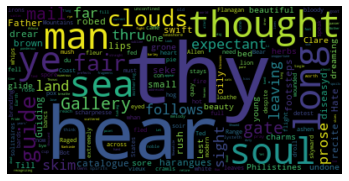

In [364]:
#make a wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in basic_limirick_df.line2)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()